In [1]:
import requests 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

requests.packages.urllib3.disable_warnings()

%matplotlib inline

In [ ]:
def get_filings(endpoint, offset, n_records, proceeding, api_key): 
    ##Gets FCC filings about given proceeding from endpoint, starting 
    ##at offset and collecting n_records (breaks if n_records too large)
    
    print("Trying to get filings {} to {}...".format(str(offset), str(offset + n_records)))

    payload = {'limit':n_records, 'proceedings.name': proceeding, 'offset':offset, 'api_key': api_key,
               "sort": "date_submission,ASC"}

    r = requests.get(endpoint, params = payload)
    filings = r.json()['filings']

    print("...got {}, returned {} filings".format(r.reason, len(filings)))
    
    return filings

def geo_clean(dic, part):
    try:
        if part in dic.keys():
            return dic[part]
        else:
            return None
    except:
        return None
    
df_filtered['city'] = df_filtered.addressentity.apply(lambda x: geo_clean(x, 'city'))
df_filtered['state'] = df_filtered.addressentity.apply(lambda x: geo_clean(x, 'state'))
df_filtered['zip_code'] = df_filtered.addressentity.apply(lambda x: geo_clean(x, 'zip_code'))

def clean_data(filings): 
    ## Clean up the raw scraped data for analysis
    df = pd.DataFrame(filings)

    print('Beginning Cleaning...')
    
    df_filtered = df[['id_submission', 'contact_email', 'date_submission', 'date_received', 
                      'date_disseminated','text_data', 'addressentity']]

    print('Extracting Geo Data')
    # Extract geo data 
    df_filtered['city'] = df_filtered.addressentity.apply(lambda x: geo_clean(x,'city'))
    df_filtered['state'] = df_filtered.addressentity.apply(lambda x: geo_clean(x,'state'))
    df_filtered['zip_code'] = df_filtered.addressentity.apply(lambda x: geo_clean(x,'zip_code'))
    
    print('Dropping addressentity')
    
    df_clean = df_filtered.drop(['addressentity'], axis = 1)

    return df_clean

# static params
PROCEEDING = '17-108'
ENDPOINT = 'https://publicapi.fcc.gov/ecfs/filings'

API_KEY = "rD4FQADVdjYymAyhmCf212Ov7um5vKqDOVb3UPcF" # Your API Key Here 

# initialize
OFFSET = 0
N_RECORDS = 10000 # larger than this seems to break the API

filings = []

while True: 
    new_filings = get_filings(ENDPOINT, OFFSET, N_RECORDS, PROCEEDING, API_KEY)
    if new_filings: 
        filings += new_filings
        OFFSET += N_RECORDS
    else: 
        break 

# clean the data up & write it to a file for analysis
df_clean = clean_data(filings)
print('complete')
df_clean.to_csv('/Users/ryand/Downloads/raw_data_pub_api_sorted_5_21_1951.csv', encoding = 'utf-8')

Beginning Cleaning...
Extracting Geo Data


/Users/ryand/pyprojects/pyproj-venv3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ryand/pyprojects/pyproj-venv3/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ryand/pyprojects/pyproj-venv3/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Dropping addressentity


In [24]:
df_final

,id_submission,contact_email,date_submission,date_received,date_disseminated,text_data,city,state,zip_code
0,04272972619149,NaN,2017-04-27T04:00:00.000Z,2017-04-27T04:00:00.000Z,2017-04-27T04:00:00.000Z,,None,None,None
1,0427547924954,NaN,2017-04-27T19:30:14.589Z,2017-04-27T19:30:14.589Z,2017-04-27T04:00:00.000Z,,None,None,None
2,10427306918439,sina@rsrf.com,2017-04-27T19:49:36.608Z,2017-04-27T19:49:36.608Z,2017-04-28T15:01:55.508Z,nan,None,None,None
3,10427231705088,bernardodsanderson@gmail.com,2017-04-27T20:00:05.188Z,2017-04-27T20:00:05.188Z,2017-04-28T15:01:17.543Z,the draft seeks comment on the analysis in par...,None,None,None
4,10427272429233,helmut@srelp.comcastbiz.net,2017-04-27T20:00:07.332Z,2017-04-27T20:00:07.331Z,2017-04-28T15:01:55.569Z,i urge the fcc in the strongest terms possible...,None,None,None
5,10427918117987,jcready@gmail.com,2017-04-27T20:03:42.802Z,2017-04-27T20:03:42.802Z,2017-04-28T15:00:03.533Z,the draft seeks comment on the analysis in par...,None,None,None
6,1042720826740,freeone3000@gmail.com,2017-04-27T20:06:39.750Z,2017-04-27T20:06:39.750Z,2017-04-28T15:01:55.508Z,the draft seeks comment on the analysis in par...,None,None,None
7,1042760334016,john@travise.net,2017-04-27T20:33:26.713Z,2017-04-27T20:33:26.713Z,2017-04-28T15:01:17.593Z,the draft seeks comment on the analysis in par...,None,None,None
8,10427253774289,feeney22@gmail.com,2017-04-27T20:35:54.735Z,2017-04-27T20:35:54.735Z,2017-04-28T15:01:55.702Z,the draft seeks comment on the analysis in par...,None,None,None
9,10427844616964,john.montefusco@gmail.com,2017-04-27T20:42:29.555Z,2017-04-27T20:42:29.555Z,2017-04-28T15:01:55.702Z,i urge the fcc to preserve net neutrality. th...,None,None,None


In [15]:
def clean_text(df):
    df['text_data'] = df['text_data'].str.lower()
    df['text_data'] = df['text_data'].map(lambda x: str(x).replace('title ii','title 2'))
    df['text_data'] = df['text_data'].map(lambda x: str(x).replace("'",""))
    df['text_data'] = df['text_data'].map(lambda x: str(x).replace("[^0-9a-zA-Z\\s]", " "))
    df['text_data'] = df['text_data'].map(lambda x: str(x).replace("[\\s]+", " "))
    return df
df_final = clean_text(df_clean)

In [13]:
print('\n\n\n\n\n\n\n\n\n\n\n\n')

In [33]:
## Top spam submission

spam_str = 'the unprecedented regulatory power the obama administration imposed on the \
internet is smothering innovation, damaging the american economy and obstructing job \
creation.\n\ni urge the federal communications commission to end the bureaucratic regulatory \
overreach of the internet known as title 2 and restore the bipartisan light-touch regulatory \
consensus that enabled the internet to flourish for more than 20 years.\n\nthe plan currently \
under consideration at the fcc to repeal obamas title 2 power grab is a positive step forward \
and will help to promote a truly free and open internet for everyone.\n'

In [34]:
df_clean['spam'] = np.where(df_clean['text_data']==spam_str, 'Spam','Not Spam')

df_clean['received'] = pd.to_datetime(df_clean['date_submission'])

df_clean['date_time'] = df_clean['received'].apply(lambda dtd: 
                                             dt(dtd.year, dtd.month, dtd.day, dtd.hour))

hourly_spam = df_clean.groupby(['date_time','spam']).sum()[['cc']]

In [148]:
pl = hourly_spam.unstack(level=1)

(0, 60000)

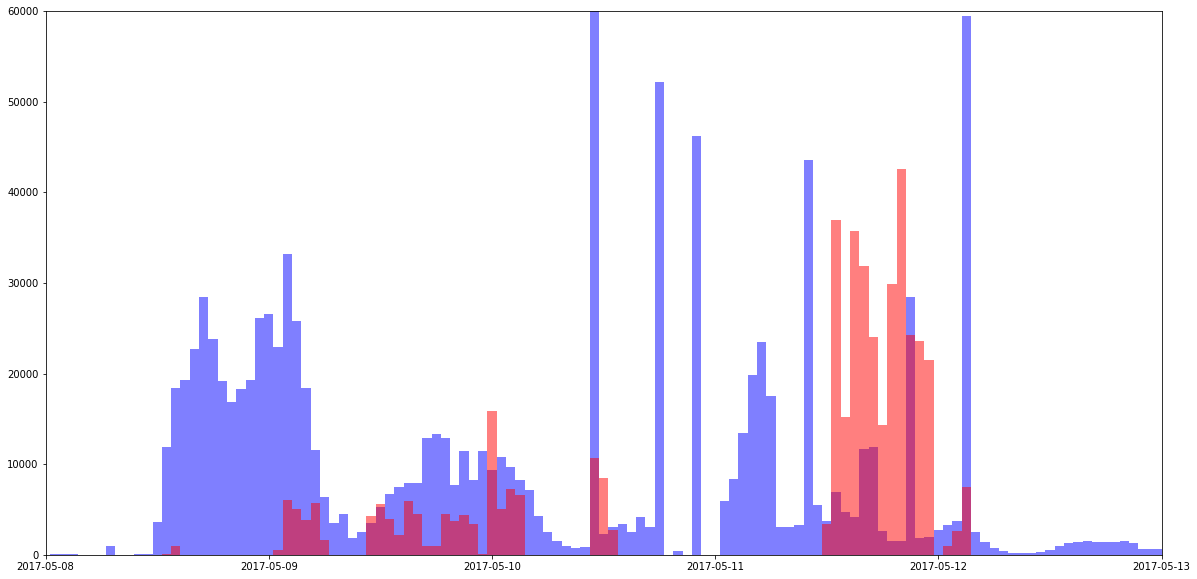

In [154]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(pl.index, 
       pl[('cc','Not Spam')], 
       color = 'blue', 
       alpha = .5, 
       width = .0415
      )
ax.bar(pl.index, 
       pl[('cc','Spam')], 
       color = 'red', 
       alpha = .5, 
       width = .0415
      )
ax.set_xlim('2017-05-08 00:00:00','2017-05-13 00:00:00')
ax.set_ylim(0,60000)